In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
from pandas import read_csv, DataFrame, get_dummies, Series
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from plotly import graph_objs, figure_factory

# Data Reading
dataset = read_csv("/content/hour.csv")

# Convert date column
dataset['dteday'] = pd.to_datetime(dataset['dteday'])
dataset['day_of_year'] = dataset['dteday'].dt.dayofyear
dataset['day_of_week'] = dataset['dteday'].dt.dayofweek

# Initial Data Exploration
print(dataset.describe())
print(dataset.shape)
print(dataset.info())


          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.0

In [2]:
dataset = read_csv("/content/hour.csv")

In [3]:
# Data Encoding (one-hot encode categorical variables)
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
# Explicitly specify the 'columns' parameter to tell get_dummies which columns to encode.
dataset = get_dummies(dataset, columns=categorical_columns)

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       17379 non-null  int64  
 1   dteday        17379 non-null  object 
 2   hr            17379 non-null  int64  
 3   temp          17379 non-null  float64
 4   atemp         17379 non-null  float64
 5   hum           17379 non-null  float64
 6   windspeed     17379 non-null  float64
 7   casual        17379 non-null  int64  
 8   registered    17379 non-null  int64  
 9   cnt           17379 non-null  int64  
 10  season_1      17379 non-null  bool   
 11  season_2      17379 non-null  bool   
 12  season_3      17379 non-null  bool   
 13  season_4      17379 non-null  bool   
 14  yr_0          17379 non-null  bool   
 15  yr_1          17379 non-null  bool   
 16  mnth_1        17379 non-null  bool   
 17  mnth_2        17379 non-null  bool   
 18  mnth_3        17379 non-nu

In [4]:
dataset['dteday'] = pd.to_datetime(dataset['dteday'])
dataset['day_of_year'] = dataset['dteday'].dt.dayofyear
dataset['day_of_week'] = dataset['dteday'].dt.dayofweek


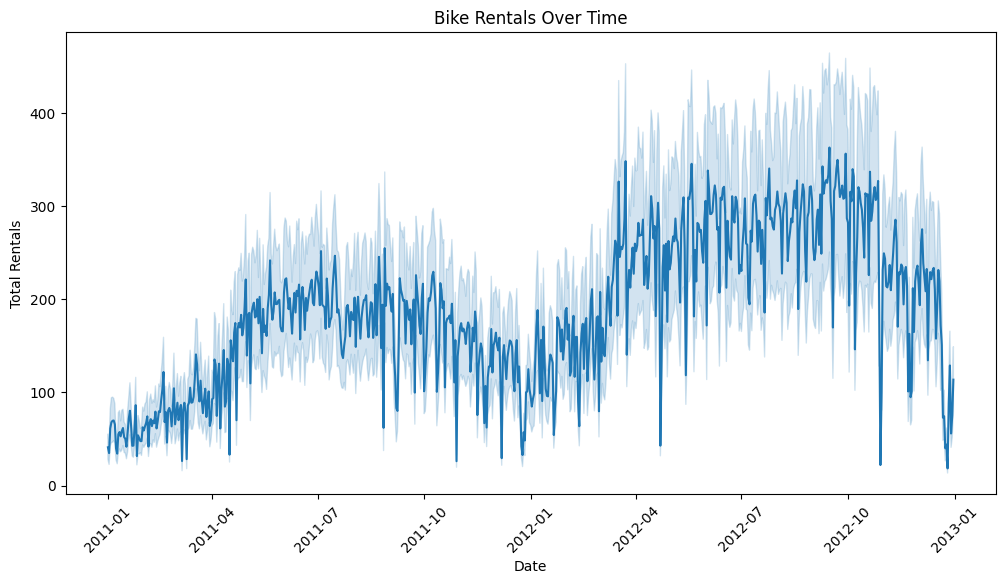

In [5]:
plt.figure(figsize=(12,6))
sns.lineplot(x=dataset['dteday'], y=dataset['cnt'])
plt.title("Bike Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.xticks(rotation=45)
plt.show()

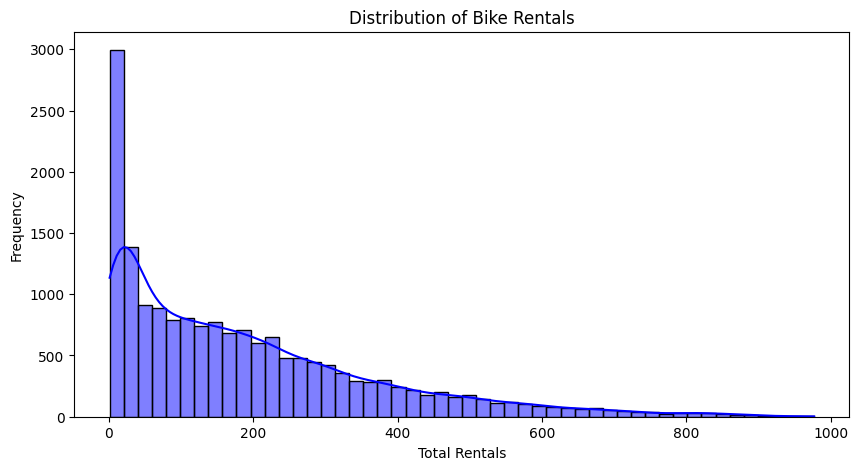

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(dataset['cnt'], bins=50, kde=True, color='blue')
plt.title("Distribution of Bike Rentals")
plt.xlabel("Total Rentals")
plt.ylabel("Frequency")
plt.show()

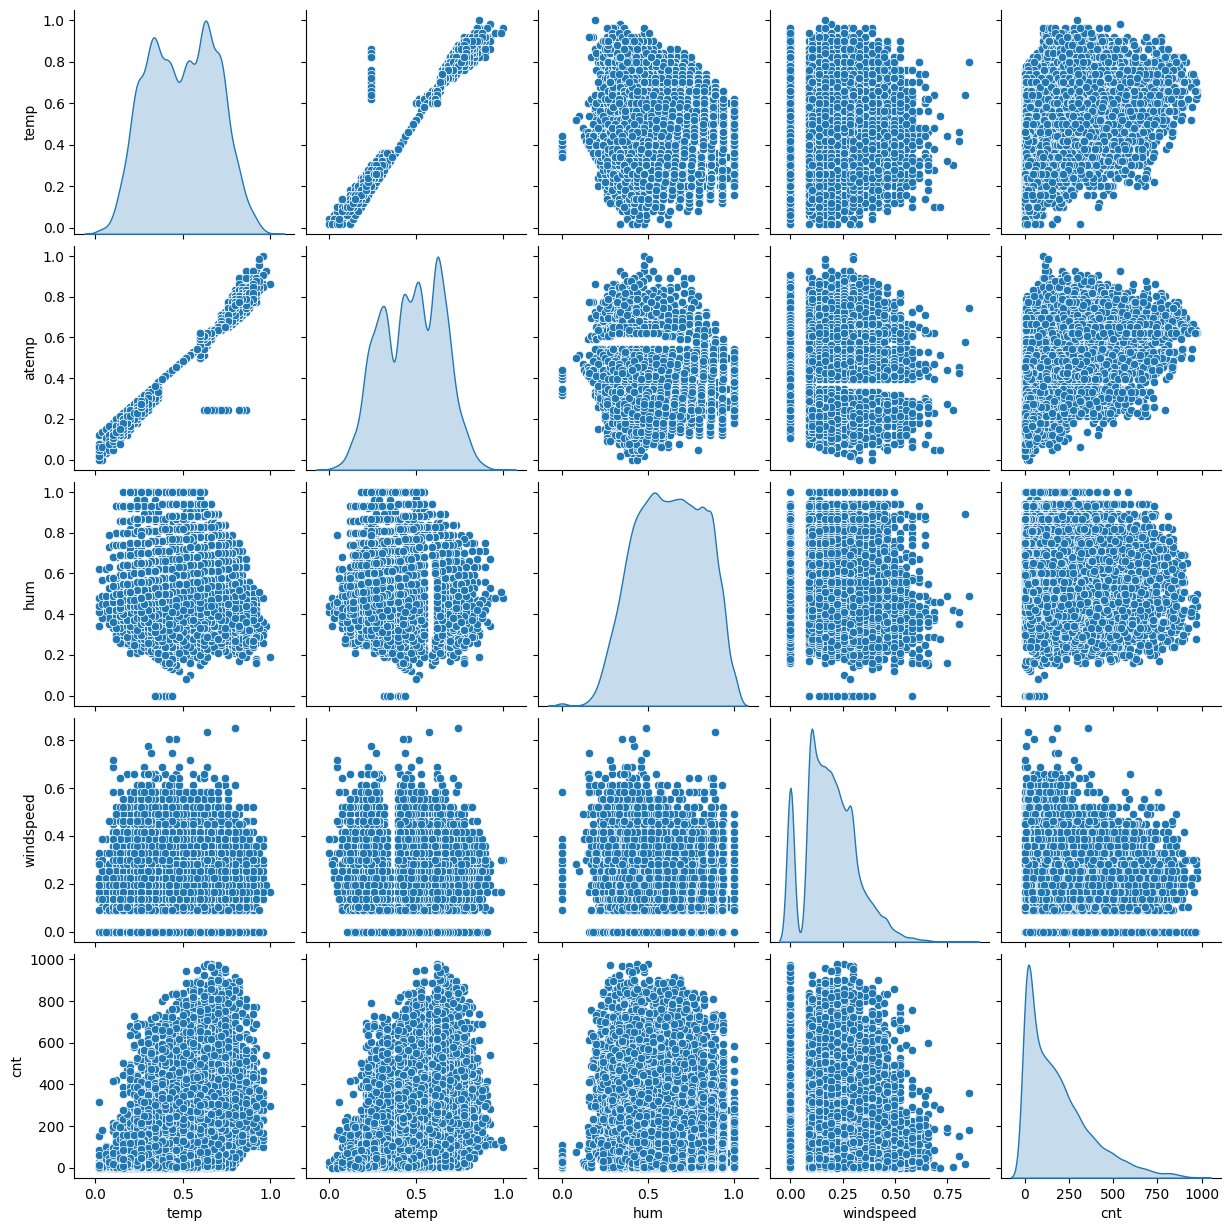

In [7]:
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(dataset[numerical_features], diag_kind='kde')
plt.show()

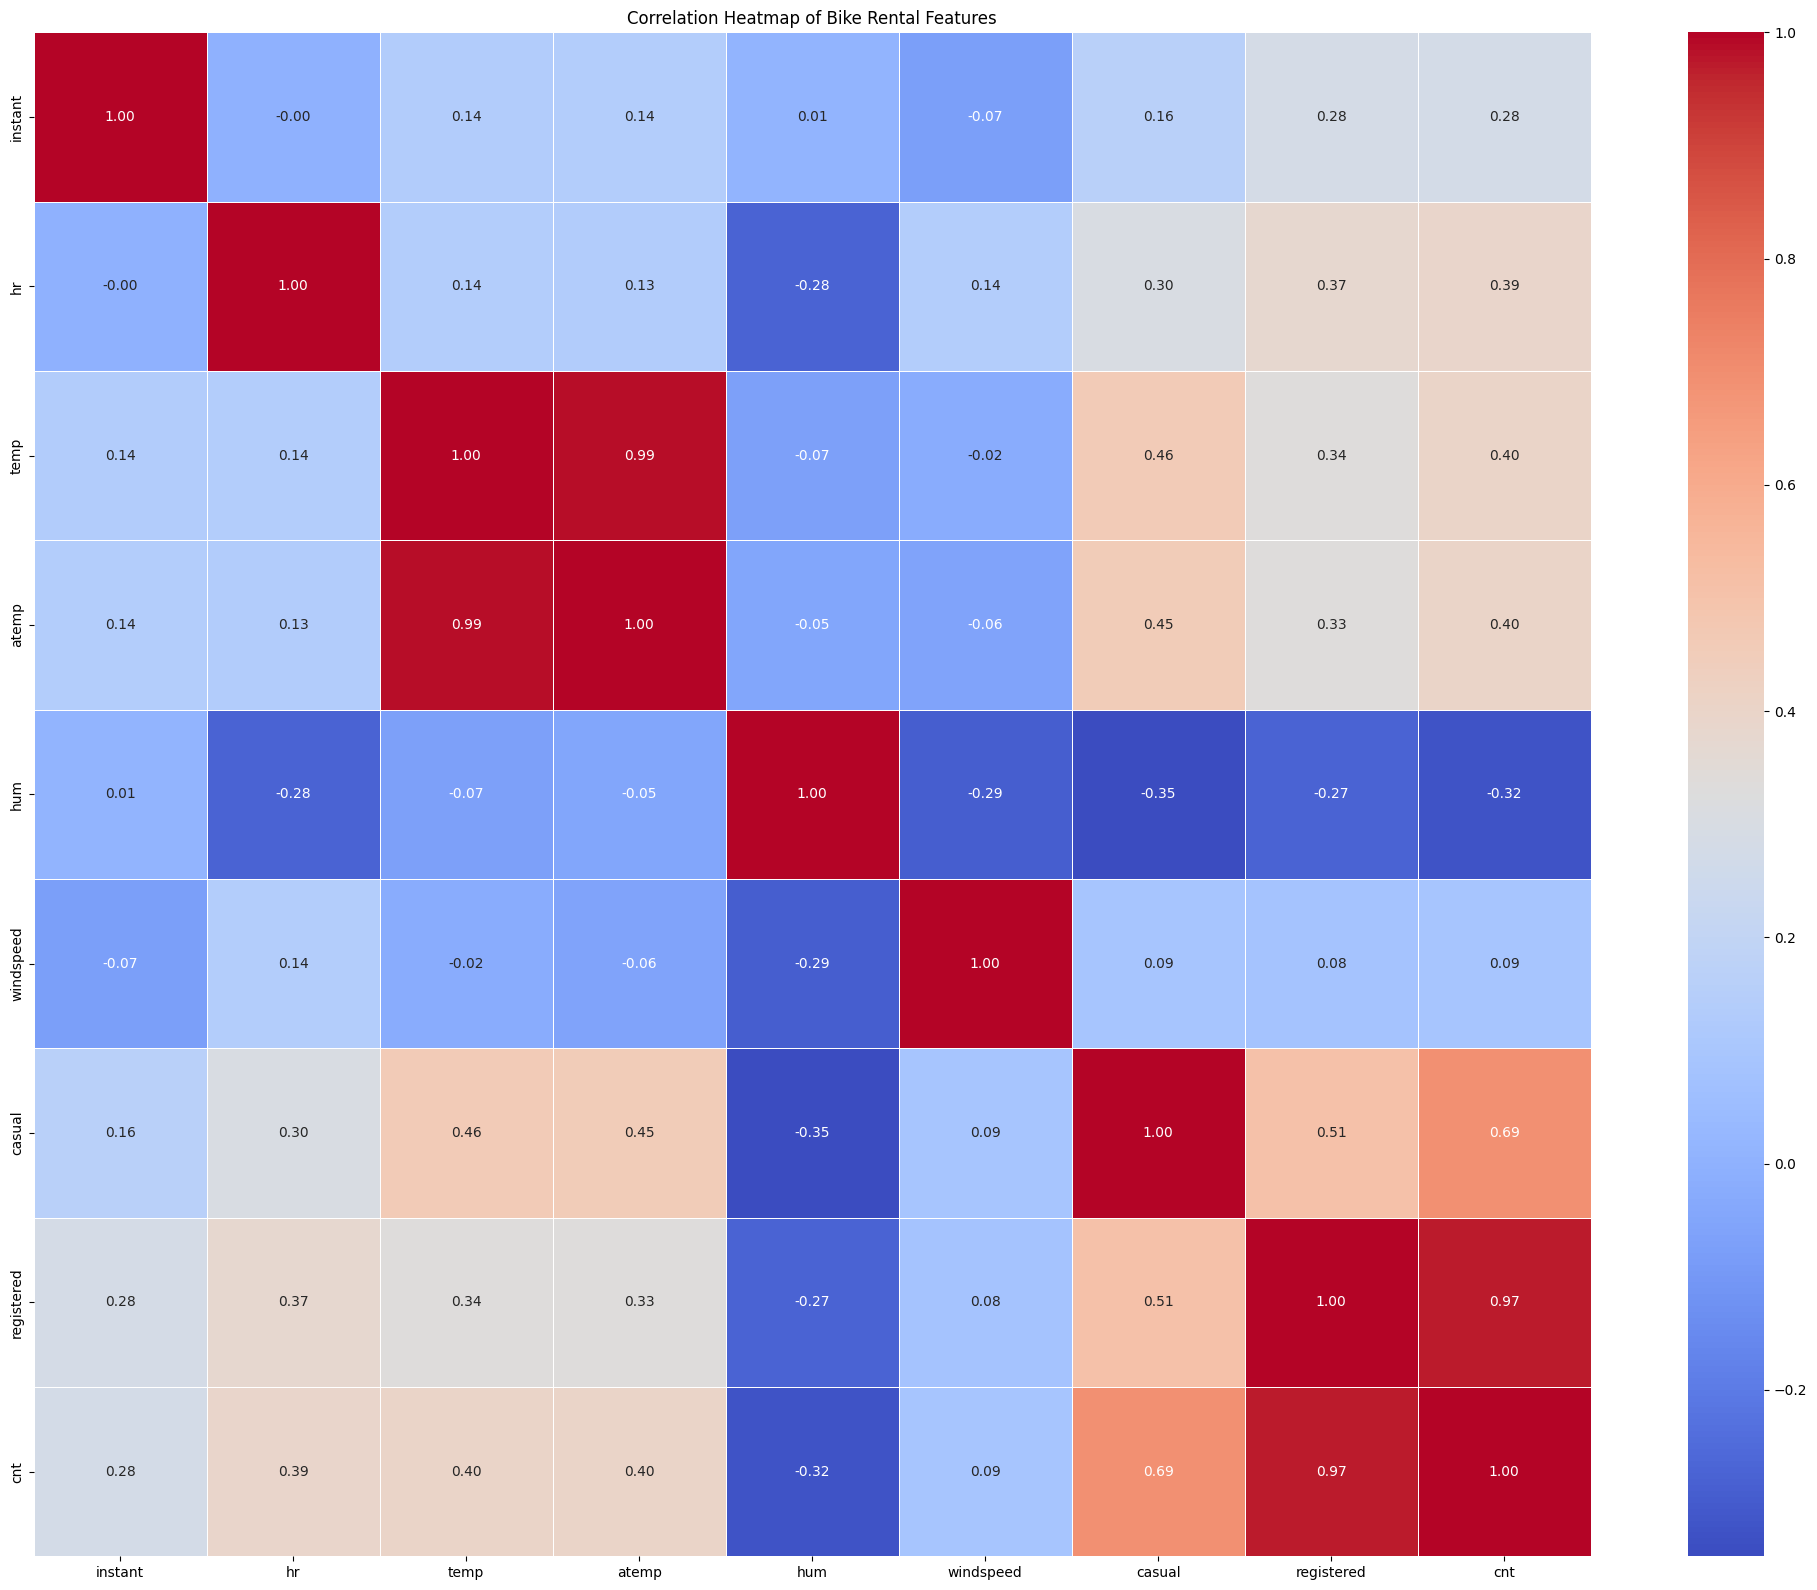

In [8]:
# Prepare for Correlation Heatmap
# Drop non-numeric columns
correlation_data = dataset.select_dtypes(include=['int64', 'float64'])

# Correlation Heatmap using Seaborn (more reliable for large datasets)
plt.figure(figsize=(20,16))
correlation = correlation_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Bike Rental Features')
plt.tight_layout()
plt.show()

In [9]:
# Prepare Features and Target
X = dataset.drop(['cnt', 'instant', 'dteday', 'casual', 'registered'], axis=1)
Y = dataset['cnt']

print("Features shape:", X.shape)
print("Target shape:", Y.shape)

Features shape: (17379, 40)
Target shape: (17379,)


In [10]:
# Data Scaling
X_ = StandardScaler().fit_transform(X)
X_ = DataFrame(X_)

In [11]:
LinearRegression1 = linear_model.SGDRegressor(random_state = 1, penalty = None)
# building
Hparameter1 = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[10000, 20000, 30000, 40000]}
grid_search1 = GridSearchCV(estimator=LinearRegression1, param_grid=Hparameter1, scoring='r2', cv=5)
grid_search1.fit(X_,Y)

best_parameters = grid_search1.best_params_
print("Best parameters: ", best_parameters)
best_result = grid_search1.best_score_
print("Best result: ", best_result)
best_model = grid_search1.best_estimator_
print("Intercept β0: ", best_model.intercept_)
print(DataFrame(zip(X.columns, best_model.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Best parameters:  {'eta0': 0.001, 'max_iter': 10000}
Best result:  0.2589634179693511
Intercept β0:  [189.30193358]
        Features  Coefficients
0             hr     50.085854
1           temp     43.396872
2          atemp     33.375860
10          yr_1     19.544269
8       season_4     14.552394
11        mnth_1      6.997386
19        mnth_9      6.605350
22       mnth_12      6.568951
20       mnth_10      5.293773
12        mnth_2      4.318892
6       season_2      4.113849
35  weathersit_2      3.757128
4      windspeed      3.657564
13        mnth_3      3.487781
21       mnth_11      2.498003
31     weekday_6      2.343045
23     holiday_0      2.189991
30     weekday_5      1.305357
33  workingday_1      0.678503
37  weathersit_4      0.657589
34  weathersit_1      0.507216
28     weekday_3      0.422040
39   day_of_week      0.312593
26     weekday_1     -0.448839
32  workingday_0     -0.678503
29     weekday_4     -0.683712
27     weekday_2     -0.744318
15        mnth_5

In [12]:
#Linear Regression Models

# 1. Linear Regression without Regularization
LinearRegression1 = linear_model.SGDRegressor(random_state=1, penalty=None)
Hparameter1 = {
    'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
    'max_iter': [10000, 20000, 30000, 40000]
}
grid_search1 = GridSearchCV(estimator=LinearRegression1, param_grid=Hparameter1, scoring='r2', cv=5)
grid_search1.fit(X_, Y)

print("\nLinear Regression (No Regularization):")
print("Best parameters: ", grid_search1.best_params_)
print("Best R² score: ", grid_search1.best_score_)
best_model = grid_search1.best_estimator_
print("Intercept β0: ", best_model.intercept_)
print(DataFrame(zip(X.columns, best_model.coef_), columns=['Features','Coefficients'])
    .sort_values(by=['Coefficients'], ascending=False))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



Linear Regression (No Regularization):
Best parameters:  {'eta0': 0.001, 'max_iter': 10000}
Best R² score:  0.2589634179693511
Intercept β0:  [189.30193358]
        Features  Coefficients
0             hr     50.085854
1           temp     43.396872
2          atemp     33.375860
10          yr_1     19.544269
8       season_4     14.552394
11        mnth_1      6.997386
19        mnth_9      6.605350
22       mnth_12      6.568951
20       mnth_10      5.293773
12        mnth_2      4.318892
6       season_2      4.113849
35  weathersit_2      3.757128
4      windspeed      3.657564
13        mnth_3      3.487781
21       mnth_11      2.498003
31     weekday_6      2.343045
23     holiday_0      2.189991
30     weekday_5      1.305357
33  workingday_1      0.678503
37  weathersit_4      0.657589
34  weathersit_1      0.507216
28     weekday_3      0.422040
39   day_of_week      0.312593
26     weekday_1     -0.448839
32  workingday_0     -0.678503
29     weekday_4     -0.683712
27   

In [13]:
X = dataset.drop(['cnt', 'instant', 'dteday', 'casual', 'registered'], axis=1)
Y = dataset['cnt']
X_scaled = StandardScaler().fit_transform(X)
rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_scaled, Y)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)


In [14]:
# 2. Linear Regression with L1 Regularization (Lasso)
LinearRegression_L1 = linear_model.SGDRegressor(random_state=1, penalty='l1')
grid_search_L1 = GridSearchCV(
    estimator=LinearRegression_L1,
    param_grid=Hparameter1,
    scoring='r2',
    cv=5
)
grid_search_L1.fit(X_, Y)

print("\nLinear Regression (L1 Regularization):")
print("Best parameters: ", grid_search_L1.best_params_)
print("Best R² score: ", grid_search_L1.best_score_)
best_model_L1 = grid_search_L1.best_estimator_
print("Intercept β0: ", best_model_L1.intercept_)
print(DataFrame(zip(X.columns, best_model_L1.coef_), columns=['Features','Coefficients'])
    .sort_values(by=['Coefficients'], ascending=False))


Linear Regression (L1 Regularization):
Best parameters:  {'eta0': 0.001, 'max_iter': 10000}
Best R² score:  0.25896422823357035
Intercept β0:  [189.30195654]
        Features  Coefficients
0             hr     50.085941
1           temp     43.395919
2          atemp     33.375467
10          yr_1     19.544239
8       season_4     14.552908
11        mnth_1      6.996747
19        mnth_9      6.604401
22       mnth_12      6.566164
20       mnth_10      5.291921
12        mnth_2      4.318175
6       season_2      4.112756
35  weathersit_2      3.754810
4      windspeed      3.657481
13        mnth_3      3.487504
21       mnth_11      2.495683
31     weekday_6      2.342388
23     holiday_0      2.190567
30     weekday_5      1.306692
33  workingday_1      0.676797
37  weathersit_4      0.657418
34  weathersit_1      0.504674
28     weekday_3      0.422710
39   day_of_week      0.310500
26     weekday_1     -0.447952
32  workingday_0     -0.676797
29     weekday_4     -0.682458
27  

In [15]:
RF_Regressor = RandomForestRegressor(
    criterion='squared_error',
    max_features='sqrt',
    random_state=1
)
no_Trees = {'n_estimators': [10, 20, 30, 40, 50, 100]}
grid_search_RF = GridSearchCV(
    estimator=RF_Regressor,
    param_grid=no_Trees,
    scoring='r2',
    cv=5
)
grid_search_RF.fit(X_, Y)

print("\nRandom Forest Regression:")
print("Best parameters: ", grid_search_RF.best_params_)
best_result_RF = grid_search_RF.best_score_
print("Best R² score: ", best_result_RF)


Random Forest Regression:
Best parameters:  {'n_estimators': 100}
Best R² score:  0.6365919156477979


**Among the regression models analysed, Random Forest Regression with decision trees delivered the best overall performance. The model achieved an impressive R² score.**

In [16]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from pandas import Series
param_grid_RF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],

}

# Create and fit GridSearchCV for Random Forest
grid_search_RF = GridSearchCV(
    estimator=RandomForestRegressor(random_state=1),
    param_grid=param_grid_RF,
    scoring='r2',
    cv=5
)
grid_search_RF.fit(X_scaled, Y)
Important_feature = Series(
    grid_search_RF.best_estimator_.feature_importances_,
    index=list(X.columns)
).sort_values(ascending=False)
print("\nFeature Importances:")
print(Important_feature)


Feature Importances:
hr              0.609920
temp            0.118397
yr_1            0.042799
yr_0            0.036705
day_of_year     0.025345
hum             0.023251
workingday_1    0.022431
day_of_week     0.022309
workingday_0    0.020708
atemp           0.017225
weathersit_3    0.015110
season_1        0.012838
windspeed       0.007298
season_4        0.005646
weekday_5       0.003013
weathersit_1    0.001739
weekday_6       0.001209
holiday_1       0.001139
holiday_0       0.001061
mnth_10         0.001054
weekday_4       0.001009
weekday_0       0.000979
weekday_3       0.000857
weathersit_2    0.000809
mnth_5          0.000746
weekday_1       0.000647
mnth_9          0.000611
weekday_2       0.000598
mnth_12         0.000579
mnth_4          0.000563
mnth_11         0.000555
season_2        0.000523
mnth_8          0.000491
mnth_7          0.000420
mnth_6          0.000405
season_3        0.000348
mnth_3          0.000337
mnth_1          0.000177
mnth_2          0.000149
wea

In [17]:
# Example Prediction (replace with your actual new data)
new_data = [[
   11.0,23,106,223,55,245,10,97,12,36,32,98,77,76,14,20,22,40,45,30,33,45,60,28,16,51,52,53,57,54,60,61,23,43,45,47,30,28,30,50
]]
prediction = grid_search_RF.best_estimator_.predict(new_data)
print("\nPrediction for new data:", prediction[0])


Prediction for new data: 114.94
